<a href="https://colab.research.google.com/github/mohadesehazari98/Quantum_Library/blob/main/Xanadu/Cat_Qubit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.6


In [ ]:
#...Installation...#
!pip install strawberryfields --upgrade

In [2]:
#...IMPORTING LIBRARIES...#

import numpy as np
import strawberryfields as sf 
from strawberryfields.ops import *
from strawberryfields.apps import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In the paper [Reference](https://journals.aps.org/pra/pdf/10.1103/PhysRevA.68.042319?casa_token=u1SaMhcSnmwAAAAA%3AiabyBitCd4es2kv31DOh7UtyfuQPaa26Azf0_p7omlioX0ANoqikg5WLSZdW0IXTrJ6dMt0kKMU-) the squeezed state is represented as:
 **𝚿**   
we can have a corespondance between Landa and r which is $ \lambda = - e^{i\phi} tanh(r) $

lets first calculate the Mean Photon number for  $\lambda cos^2(\theta) = 0.4 $

In [ ]:
#...SEED...#
np.random.seed(42)
phi_r = (np.pi)
phi_B = (np.pi)/2
r_squeezed = 1.5
k = 0.268530
theta = k * (np.pi)/2
shots = 3500
modes_N = 2
m_range = 6

In [3]:
#...TOKEN KEY...#

import xcc
settings = xcc.Settings(REFRESH_TOKEN="eyJhbGciOiJIUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwYTdjOGE5Yi1lMzdkLTQ0MzItOTU2OC0xNzI3YzEwNmYyMzEifQ.eyJpYXQiOjE2NjgzMDQzNDQsImp0aSI6IjllY2E5MzczLTRkZDQtNGVmNy1iYmE4LTU5NmNhMzNhNWUyMyIsImlzcyI6Imh0dHBzOi8vcGxhdGZvcm0ueGFuYWR1LmFpL2F1dGgvcmVhbG1zL3BsYXRmb3JtIiwiYXVkIjoiaHR0cHM6Ly9wbGF0Zm9ybS54YW5hZHUuYWkvYXV0aC9yZWFsbXMvcGxhdGZvcm0iLCJzdWIiOiI5YjVhYTExYS03NWY4LTQ0YTItYjkwZS1lZmRlZmM0YmRkOTciLCJ0eXAiOiJPZmZsaW5lIiwiYXpwIjoicHVibGljIiwic2Vzc2lvbl9zdGF0ZSI6IjIzMDBjOTE5LTRhNmYtNGI0ZC05ZTBmLTlkMmNmMTdlNmU4OSIsInNjb3BlIjoicHVibGljLXJvbGVzIHByb2ZpbGUgZW1haWwgb2ZmbGluZV9hY2Nlc3MiLCJzaWQiOiIyMzAwYzkxOS00YTZmLTRiNGQtOWUwZi05ZDJjZjE3ZTZlODkifQ.2MKFiX-Ranfnzo3xQezaGLao6wYVzNOxyiIKrtn50Mc")
settings.save()

In [ ]:
#...SETTING THE CIRCUIT/PROGRAM...#

program = sf.Program(modes_N)

In [ ]:
def first_circuit(m):
  #eng.reset()
  program = sf.Program(2)
  eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 30})

  with program.context as q:
    Sgate(r_squeezed,phi_r) | q[0]
    Vac | q[1]
    BSgate(theta,phi_B) | (q[0], q[1])
    MeasureFock(select=m) | q[0]
    MeasureFock() | q[1]  

  #post selection 
  result = np.zeros((shots,2))
  for i in range(len(result)):
    out_result = eng.run(program)
    result[i,:] = out_result.samples

  vector = result[:,1]
  final_out = sum(vector) / shots
  return final_out

In [ ]:
#post selection 

mean_inside = np.zeros((m_range+1,1))
for m in range(m_range+1):
  mean_inside[m,0] = first_circuit(m)
  print(mean_inside[m,0])

0.02
1.0725714285714285
0.18685714285714286
1.2062857142857142
0.5422857142857143
1.4057142857142857
0.972
1.5691428571428572


In [4]:
mean_inside = [0.02,1.0725714285714285,0.18685714285714286,1.2062857142857142,0.5422857142857143,1.4057142857142857,0.972,1.5691428571428572]

for $\lambda cos^2(\theta) = 0.4 $ and $ m = [0,1,2,3,4,5]$

*based on the plot, one can neither approve or reject the idea that mean_photon_number will increase as m goes higher, for odd m*

*Also the question that why for even m, the difference is so evident, but for odd m the comparison is hard, is not clear*

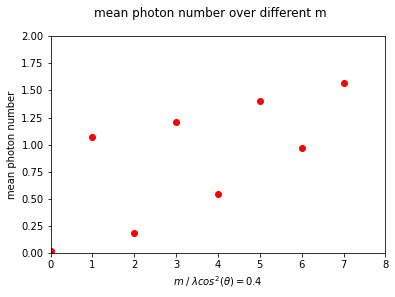

In [11]:
m_axis = [0, 1, 2, 3, 4, 5, 6, 7]
plt.plot(m_axis, mean_inside, 'ro')
# naming the x axis
plt.xlabel(r'$m _ / _ \lambda cos^2(\theta)=0.4$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0, 8, 0, 2])
plt.suptitle('mean photon number over different m ')
plt.show()


Now we would set m to be "0" and plot the Mean_Photon_Number for differet $\theta$

$ \lambda cos^2(\theta) = [0,0.08,0.16,0.24,0.32,0.4,0.48,0.64,0.72,0.8] = \bar{k} $

$ tanh(r) cos^2(2 \theta ') = \bar{k}$

$ \theta ' = (\cos^{-1} {\sqrt{\frac{k[i]}{tanh(r)}}} )/ 2$

In [ ]:
k = [0,0.08,0.16,0.24,0.32,0.4,0.48,0.64,0.72,0.8]
angles = np.zeros((len(k),1))
for i in range(len(k)):
  angles[i,0] = np.arccos(np.sqrt(k[i]/np.tanh(r_squeezed))) / 2

In [ ]:
from scipy.stats import median_test
def run_circuit(bs_angle,m):
  #eng.reset()
  program = sf.Program(2)
  eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 30})

  with program.context as q:
    Sgate(r_squeezed,phi_r) | q[0]
    # q1 is initialized in a vaccum state by default
    BSgate(bs_angle,phi_B) | (q[0], q[1])
    MeasureFock(select=m) | q[0]
    MeasureFock() | q[1]

  #post selection 
  result = np.zeros((shots,2))
  for i in range(len(result)):
    out_result = eng.run(program)
    result[i,:] = out_result.samples

  vector = result[:,1]
  final_out = sum(vector) / shots
  return final_out

In [ ]:
results = np.empty((shots, 2))
m_list =np.zeros((len(k),m_range))
# this loops evaluate all angles
for m in range(1,m_range+1):
  mean_photon_list = []
  for j in range(len(k)):
    # this loop runs the circuit `num_shots` times
    mean_output = run_circuit(angles[j,0],m)
    # here you get the maverage for both detectors
    mean_photon_list.append(mean_output)
    # replace this print statement by any postprocessing you'd to perform
  m_list[:,m-1] = mean_photon_list
  print(mean_photon_list)

[1.766857142857143, 1.324, 1.2, 1.1622857142857144, 1.1022857142857143, 1.0822857142857143, 1.0514285714285714, 1.0154285714285713, 1.0085714285714287, 1.0017142857142858]
[1.8622857142857143, 0.8948571428571429, 0.6194285714285714, 0.4177142857142857, 0.30457142857142855, 0.19485714285714287, 0.1382857142857143, 0.044, 0.022285714285714287, 0.004]
[3.028, 1.9051428571428572, 1.5817142857142856, 1.4257142857142857, 1.3, 1.189142857142857, 1.1222857142857143, 1.0422857142857143, 1.0165714285714287, 1.0074285714285713]
[3.7045714285714286, 1.9508571428571428, 1.4034285714285715, 1.0325714285714285, 0.7342857142857143, 0.47485714285714287, 0.36, 0.14342857142857143, 0.05885714285714286, 0.018857142857142857]
[4.66, 2.7417142857142855, 2.158857142857143, 1.7982857142857143, 1.5617142857142856, 1.3788571428571428, 1.258857142857143, 1.082857142857143, 1.036, 1.0125714285714287]
[5.329714285714286, 3.0062857142857142, 2.241142857142857, 1.6902857142857144, 1.2817142857142858, 0.9342857142857

$ <n> mean-photon-number $

*Why the mean photon number is decreasing over higher θ*

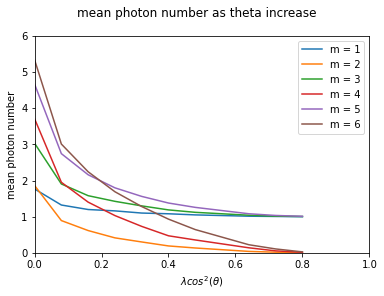

In [ ]:
plt.plot(k, m_list[:,0], label = "m = 1") #m=1 ,shots=2500
plt.plot(k, m_list[:,1], label = "m = 2") #m=2 ,shots=2500
plt.plot(k, m_list[:,2], label = "m = 3") #m=3 ,shots=2500
plt.plot(k, m_list[:,3], label = "m = 4") #m=4 ,shots=2500
plt.plot(k, m_list[:,4], label = "m = 5") #m=5 ,shots=2500
plt.plot(k, m_list[:,5], label = "m = 6") #m=6 ,shots=2500
plt.legend()
# naming the x axis
plt.xlabel(r'$\lambda cos^2(\theta)$')
# naming the y axis
plt.ylabel('mean photon number')
plt.axis([0, 1, 0, 6])
plt.suptitle('mean photon number as theta increase')
plt.show()